
### Marking Rubric (which may award partial credit) 

- [0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
- [0.2 points]: Assignment completion confirmed by visual submission for "2" 
- [0.3 points]: Evaluation of written communication for "3" 
- [0.1 points]: Correct answers for "4"
- [0.3 points]: Evidence of meaningful activity for "6"

<!-- - [0.1 points]: Assignment completion confirmed by ChatBot interaction summaries for "5" -->


### "Pre-lecture" HW [*completion prior to next LEC is suggested but not mandatory*]


#### 1. Use *fig.add_[h/v]line()* and *fig.add_[h/v]rect()* to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of *flipper_length_mm* for each _species_ onto _plotly_ histograms of *flipper_length_mm* for each _species_ in the penguins dataset<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

**Time Management Warning**: it takes a long time to make a figure, whether you're working with a ChatBot, or building it from scratch based on trial and error changes with your code. ChatBots remove the need to understand the detailed nuances of data visualization library arguments and construction procedures. But after you've passed the 30 minute range of effort working with your ChatBot for this problem to try to get what you want, then your only options are to start a new session and hope for a smoother experience based on improved clarity of your directions, or submit what you have along with a brief note highlighting the duration in your chatlog history where your efforts to make progress did not produce the desired outcome.

> The code referenced above [*fig.add_[h/v]line()*](https://plotly.com/python/horizontal-vertical-shapes/) and [*fig.add_[h/v]rect()*](https://plotly.com/python/line-charts/) refer to `fig.add_hline()` and `fig.add_hline()` and `fig.add_hrect()` and `fig.add_vrect()` which overly lines rectangles onto a figure from different orientation perspectives.
>
> - _There are several considerations in this problem..._
>     - _The histograms can be on the same figure, on separate figures, or separated into different panels in the same figure_
>     - _The elements within a figure should be well annotated, probobably using a so-called legend to help make sure annotations don't overlap each other and are clear and readible_
> - _There are several ways to approach this problem..._
>     - _You will likely be very pleased when you run the code returned to you as the result of pasting this question in as a prompt into a ChatBot session; but, you will also likely need to interact with the ChatBot to ask for adjustments to the code which give a final satisfactory figure (and this is the recommended approach to get the experience this problem intends you to have)_
>     - _**When using a ChatBot, if the code provided by your ChatBot results in an error, show the error to your ChatBot and iterate this process with the adjusted "fixed" code provided by the ChatBot... this process usually converges some something workable that's pretty close to what you were going for**_
>     - <u>**And don't forget, a ChatBot can explain what how code it provides works, if you ask it to...**</u>
>     - _You could alternatively figure out how to code this plot up for yourself by looking at the provided documentation links and perhaps using some additional google searchers or ChatBot queries to help out with specific issues or examples; and, if you end up interested in figuring out a little more how the code works that's great and definitely feel free to go ahead and do so, but at this stage the point of this problem is to understand the general ideas of figures themselves as opposed to being an expert about the code that generated them_
    
</details>


In [31]:
import pandas as pd 
pen = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


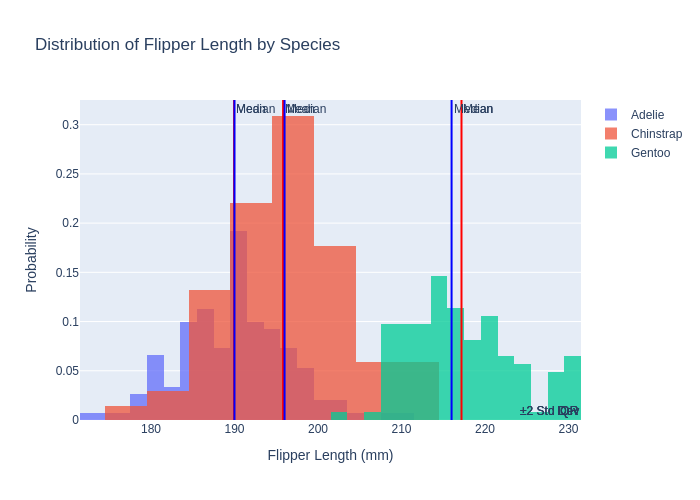

In [32]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
pen = pd.read_csv(url)

# Filter out any rows with missing values in flipper_length_mm
pen = pen.dropna(subset=['flipper_length_mm'])

# Group by species and calculate statistics
species_stats = pen.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Create a histogram for each species
fig = go.Figure()

for _, row in species_stats.iterrows():
    species = row['species']
    flipper_lengths = pen[pen['species'] == species]['flipper_length_mm']

    # Create histogram
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=species,
        opacity=0.75,
        histnorm='probability',
        xaxis='x1',
        yaxis='y1'
    ))

    # Add mean and median lines
    fig.add_vline(x=row['mean'], line_color='red', line_width=2, annotation_text='Mean', annotation_position='top right')
    fig.add_vline(x=row['median'], line_color='blue', line_width=2, annotation_text='Median', annotation_position='top right')

    # Add rectangles for range, IQR, and ±2 std deviations
    fig.add_hrect(y0=0, y1=0.1, x0=row['q1'], x1=row['q3'], fillcolor='lightgrey', line_width=0, annotation_text='IQR', annotation_position='bottom right')
    fig.add_hrect(y0=0, y1=0.1, x0=row['mean'] - 2 * row['std'], x1=row['mean'] + 2 * row['std'], fillcolor='lightyellow', line_width=0, annotation_text='±2 Std Dev', annotation_position='bottom right')

# Update layout
fig.update_layout(
    title='Distribution of Flipper Length by Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Probability',
    barmode='overlay'
)

# Show the plot
fig.show(renderer="png")

#### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using _seaborn_ **kernel density estimation** (KDE) plots to produce the desired figures organized in row of three plots<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
**Time Management Warning**: it takes a long time to make a figure, whether you're working with a ChatBot, or building it from scratch based on trial and error changes with your code. ChatBots remove the need to understand the detailed nuances of data visualization library arguments and construction procedures. But after you've passed the 30 minute range of effort working with your ChatBot for this problem to try to get what you want, then your only options are to start a new session and hope for a smoother experience based on improved clarity of your directions, or submit what you have along with a brief note highlighting the duration in your chatlog history where your efforts to make progress did not produce the desired outcome.
    
> The `seaborn` library extends `matplotlib` so [_ax.axhspan(...)_](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py) or [_ax.fill_between(...)_](https://matplotlib.org/stable/gallery/lines_bars_and_markers/span_regions.html) from `matplotlib` could be combined with the [_seaborn_ KDE plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)... this might be something to share with your ChatBot if it [tries to keep using _plotly_ or a KDE function rather than a _plotly_](https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/GPT/SLS/00001_gpt3p5_plotlyseaborn_plotting.md) plotting functionality...
> 
> - _When using a ChatBot, if the code provided by your ChatBot results in an error, show the error to your ChatBot and iterate this process with the adjusted "fixed" code provided by the ChatBot... this process usually converges some something workable that's pretty close to what you were going for_
> - _**Also consider the ways that you might be able to split up the instructions for the ChatBot into multiple steps, creating a sequence of additional directions and extensions along the way as you mold the figure more and more into a form increasingly matching your desired output.**_
> - And don't forget, a ChatBot can explain what how code it provides works, if you ask it to...
> 
> The technical details of the following are beyond the scope of STA130, but if you were interested, you could very briefly examine the [_seaborn_ themes](https://seaborn.pydata.org/tutorial/aesthetics.html) based on `sns.set_style()` and `sns.set_theme()` and [_colors_](https://seaborn.pydata.org/tutorial/color_palettes.html) based on the `palette` parameter, e.g.,
> 
> ```python
> sns.set_style("whitegrid") # sns.set_style("dark")
> # `sns.set_palette()` exists but functions often access and set that directly
> sns.boxplot(..., hue='column', palette="colorblind") 
> ```    
> 
> and then attempt to interact with the ChatBot to change the coloring of the figure to something that you like and looks more clear to you... 

</details>


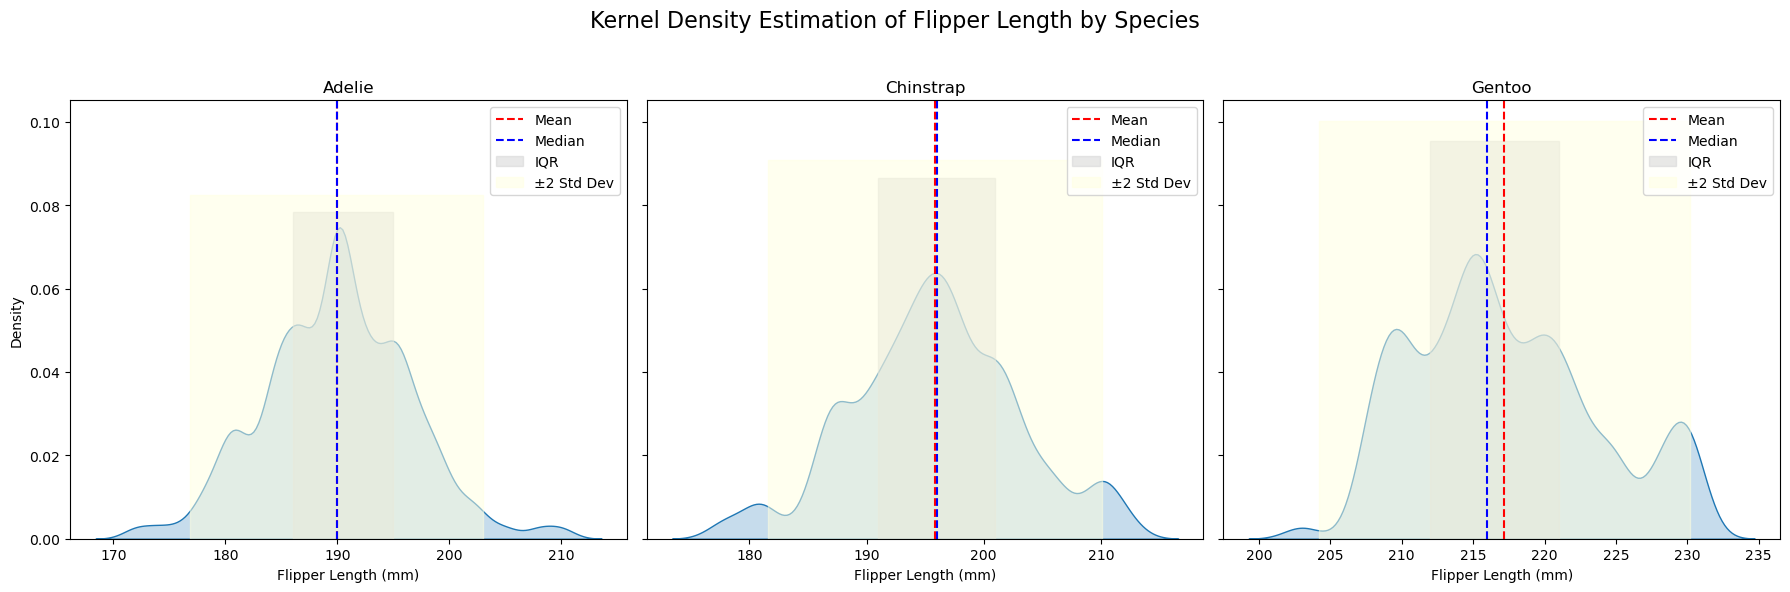

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
pen = pd.read_csv(url)

# Filter out any rows with missing values in flipper_length_mm
pen = pen.dropna(subset=['flipper_length_mm'])

# Group by species and calculate statistics
species_stats = pen.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Set up the matplotlib figure with a row of 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterate over species and create KDE plots
for ax, (species, group) in zip(axes, pen.groupby('species')):
    # Create a KDE plot for the current species
    sns.kdeplot(data=group, x='flipper_length_mm', ax=ax, fill=True, bw_adjust=0.5)

    # Calculate statistics for the current species
    stats = species_stats[species_stats['species'] == species].iloc[0]
    
    # Add vertical lines for mean and median
    ax.axvline(stats['mean'], color='red', linestyle='--', label='Mean')
    ax.axvline(stats['median'], color='blue', linestyle='--', label='Median')

    # Add shaded region for interquartile range
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], 
                     x1=stats['q1'], x2=stats['q3'], 
                     color='lightgrey', alpha=0.5, label='IQR')

    # Add shaded region for ±2 standard deviations
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], 
                     x1=stats['mean'] - 2 * stats['std'], 
                     x2=stats['mean'] + 2 * stats['std'], 
                     color='lightyellow', alpha=0.5, label='±2 Std Dev')

    # Set titles and labels
    ax.set_title(species)
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Set the overall title
plt.suptitle('Kernel Density Estimation of Flipper Length by Species', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust title position
plt.show()

Chat 1-2: https://chatgpt.com/share/66f46f15-3ea4-8010-9cab-3349bd78d1cb

#### 3. Search online for some images of **box plots**, **histograms**, and **kernel density estimators** (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> The details of the ["kernel"](https://en.wikipedia.org/wiki/Kernel_density_estimation) and how it works in [kernel density estimation](https://plotly.com/python/violin/#split-violin-plot) are beyond the scope of STA130; but, there is typically a so-called "bandwidth" **argument** (e.g., `bw_adjust` in [_seaborn_](https://stackoverflow.com/questions/37932283/confusion-with-bandwidth-on-seaborns-kdeplot)) that "controls the width of the kernel" which is analgous to the "number of bins parameter" of a histogram (e.g., `nbins` in [_plotly_](https://www.google.com/search?client=safari&rls=en&q=plotly+nbins&ie=UTF-8&oe=UTF-8))  <!-- 4. Report on your preferences between `plotly` and `seaborn` in terms of usability and the general visual aestetics -->
> 
> _Don't forget to ask for summaries of your ChatBot session(s) and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatGPT)_
    
</details>

I believe box plot is good at providing summary data such as mean, median, quartiles and more but couldn’t form a shape and size of the data. Histograms and KDE both shows the shape and size of the sample but lacks summary statistics of the data. Histogram are limited according to the number of bins and look different if you change the number of bins, but KDE is not limited and provides accurate shape and distribution of data.

Summary of conversation: 
In this conversation, we discussed the differences between three data distribution visualization methods: box plots, histograms, and kernel density estimators (KDEs). You pointed out that:

	•	Box plots provide summary statistics (like the median and quartiles) but do not show the data’s shape or size.
	•	Histograms and KDEs both show the shape and size of the data distribution, but histograms are sensitive to the number of bins, while KDEs provide a smoother, more accurate representation of the distribution.

I agreed with your assessment and expanded on the pros and cons of each method:

	•	Box plots are great for summaries but lack shape detail.
	•	Histograms show distribution but are bin-dependent.
	•	KDEs provide a smooth and flexible distribution but depend on the bandwidth chosen.

Lastly, we discussed how your preference for KDE makes sense, given its strength in accurately visualizing the distribution without being limited by bins.

Link: https://chatgpt.com/share/66f59ddb-2030-8010-befa-38d48c983f6f

#### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

1. Which datasets have similar means and similar variances
2. Which datasets have similar means but quite different variances
3. Which datasets have similar variances but quite different means
4. Which datasets have quite different means and quite different variances
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> Can you answer these questions immediately? If not, first review what the basic ideas of **sample means** and **sample standard deviations** (and **sample variances**) are. Their mathematical definitions are given below, and are useful for understanding the intuition of these concepts in terms of "averages" of things, like "observations" or "squared differences" (and then perhaps square-rooted). But there are other ways to "intuitively visually" understand **sample means** and **sample standard deviations** (and **sample variances**) which a ChatBot would be able to discuss with you.
>
> - sample mean $\displaystyle \bar x = \frac{1}{n}\sum_{i=1}^n x_i$ 
> - sample variance $\displaystyle s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i-\bar x)^2$
> - sample standard deviation $\displaystyle s = \sqrt{s^2}$
>
> It's potentially maybe possible that you or a ChatBot could answer these questions by looking at the code that produced the data you're considering. But if you're trying to check and understand things that way, you should instead consider just calculate the statistics that answer the questions themselves...
> - `np.mean(df.col)` or `df.col.mean()`
> - `np.std(df.col, dof=1)` / `np.var(df.col, dof=1)` or `df.col.std(dof=1)` / `df.col.var(dof=1)`
>
> _If you are resorting to calculating the statistics that answer the questions, try to understand the answers after you have them... just getting the "right" answers kind of defeats the point of this exercise..._
>
> - The difference between trying to answer this question using the code that produced the data versus calculating the statistics from the data comes down to the difference between **parameters** and **statistics**, but this will be discussed in the lecture... in the meantime, howevever, if you're curious about this... you could consider prompting a ChatBot to explain the difference between **parameters** and **statistics**...
>     - ... this would naturally lead to some discussion of the relationship between **populations** and **samples**, and from there it would only be a little further to start working to understand the relationship between **statistics** and **parameters** and how they connect to *populations* and *samples* (and hence each other)...    
    
</details>  

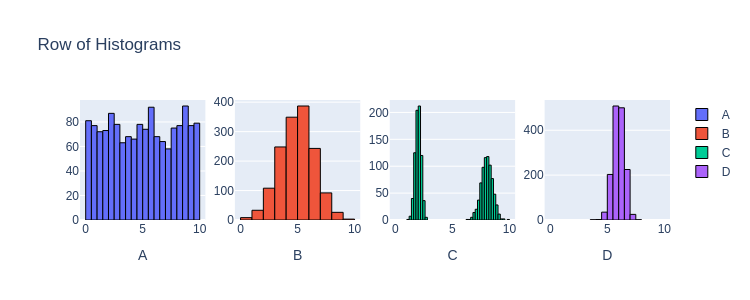

5.020828294685156
8.583033430421851
4.9689359465475915
2.3298977947816697
5.005045044844789
9.23865720331941
5.9994397584373
0.24835300606596813


In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
print(data1.mean())
print(data1.var())
print(data2.mean())
print(data2.var())
print(data3.mean())
print(data3.var())
print(data4.mean())
print(data4.var())

1. None, all variance vary
2. A,B or B,C or A,C
3. None, all variance vary
4. A,D or B,D or C,D

#### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data<br>

1. Your approach should likely follow what was suggested for the **Week 02 TUT Communication Activity from TUT**
2. In the **Week 03 TUT Communication Activity from TUT** you will be put in groups and determine which group members dataset introduction will be presented by the group

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> A good place to browse datasets is [TidyTuesday](https://github.com/rfordatascience/tidytuesday/blob/master/README.md) as working with ChatBots to find unconventional and entertaining datasets is not particularly productive and only seems to end up with the datasets seen here and other (more interesting?) suggestions like [iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv), [superheros](https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv), [hauntings](https://raw.githubusercontent.com/andreamoleri/Hauntings/main/hauntings.csv), [bigfoot](https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/bigfoot_mod.csv), [ufos](https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv), [sharks](https://raw.githubusercontent.com/IbaiGallego/DataCleaning_SharkAttack/main/data/jaws.csv), [legos](https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv), [bees](https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv), [housing](https://raw.githubusercontent.com/slavaspirin/Toronto-housing-price-prediction/master/houses_edited.csv), and [gapminder](https://raw.githubusercontent.com/kirenz/datasets/master/gapminder.csv)
> ```python
> # Maybe something like this? Feel free to use this one 
> # if it strikes your fancy after look around a bit
> import pandas as pd
> df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
> df # df.columns
> ```

</details>

In [25]:
import pandas as pd
hero = pd.read_csv("https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv")
hero # df.columns

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Alter Egos,Publisher,Alignment,Gender,Race,Height,Weight,Eye color,Hair color,Skin color,Total Power
0,3-D Man,80,35,45,35,25,55,No,Marvel Comics,good,Male,NaN,6'2 // 188 cm,200 lb // 90 kg,Brown,Grey,NaN,275
1,A-Bomb,75,100,20,80,25,65,No,Marvel Comics,good,Male,Human,6'8 // 203 cm,980 lb // 441 kg,Yellow,No Hair,NaN,365
2,Abe Sapien,95,30,35,65,100,85,No,Dark Horse Comics,good,Male,Icthyo Sapien,6'3 // 191 cm,145 lb // 65 kg,Blue,No Hair,Blue,410
3,Abin Sur,80,90,55,65,100,65,No,DC Comics,good,Male,Ungaran,6'1 // 185 cm,200 lb // 90 kg,Blue,No Hair,Red,455
4,Abomination,85,80,55,90,65,95,Yes,Marvel Comics,bad,Male,Human / Radiation,6'8 // 203 cm,980 lb // 441 kg,Green,No Hair,NaN,470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,Yellowjacket II,80,10,35,30,35,30,No,Marvel Comics,good,Female,Human,5'5 // 165 cm,115 lb // 52 kg,Blue,Auburn,NaN,220
739,Ymir,80,100,30,100,100,30,No,Marvel Comics,good,Male,Frost Giant,100000 // 30480 cm,- lb // 0 kg,White,No Hair,White,440
740,Yoda,95,55,35,25,100,90,No,George Lucas,good,Male,Yoda's species,2'2 // 66 cm,38 lb // 17 kg,Brown,White,Green,400
741,Zatanna,95,10,25,30,100,60,Yes,DC Comics,good,Female,Human,5'7 // 170 cm,127 lb // 57 kg,Blue,Black,NaN,320


In [26]:
hero.isnull().sum()

Name              0
Intelligence      0
Strength          0
Speed             0
Durability        0
Power             0
Combat            0
Alter Egos        0
Publisher         8
Alignment         6
Gender            0
Race            295
Height            0
Weight            0
Eye color       171
Hair color      170
Skin color      668
Total Power       0
dtype: int64

In [27]:
hero.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total Power
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,75.632571,42.415882,41.063257,55.713324,60.969044,57.489906,358.156124
std,27.617738,34.366396,27.479716,33.277238,34.257671,29.130334,107.582626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000
25%,75.000000,10.000000,25.000000,30.000000,35.000000,40.000000,260.000000
50%,85.000000,35.000000,35.000000,60.000000,65.000000,65.000000,350.000000
75%,90.000000,75.000000,60.000000,85.000000,95.000000,80.000000,440.000000
max,100.000000,100.000000,100.000000,100.000000,240.000000,105.000000,600.000000


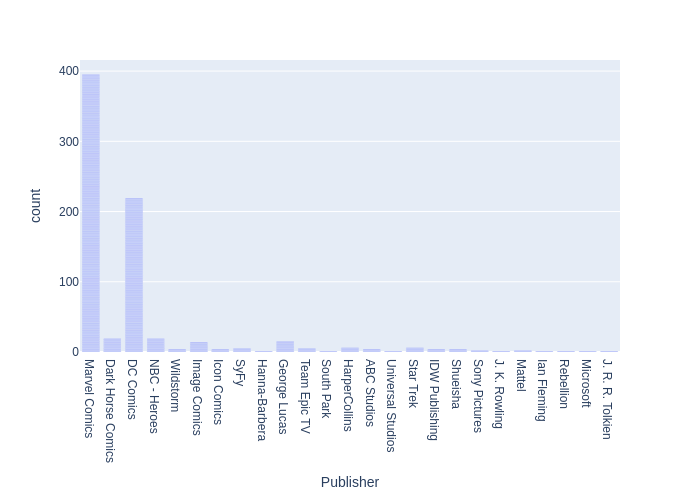

In [34]:
import plotly.express as px

fig = px.bar(hero, x='Publisher')

fig.show(renderer="png")

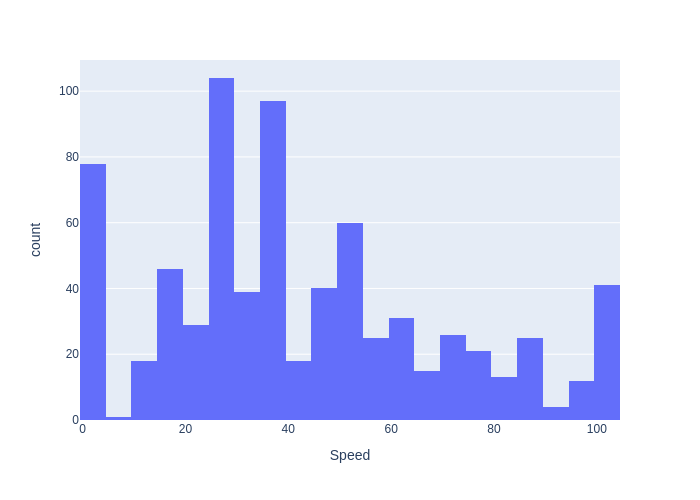

In [33]:
fig = px.histogram(hero, x='Speed')

fig.show(renderer="png")

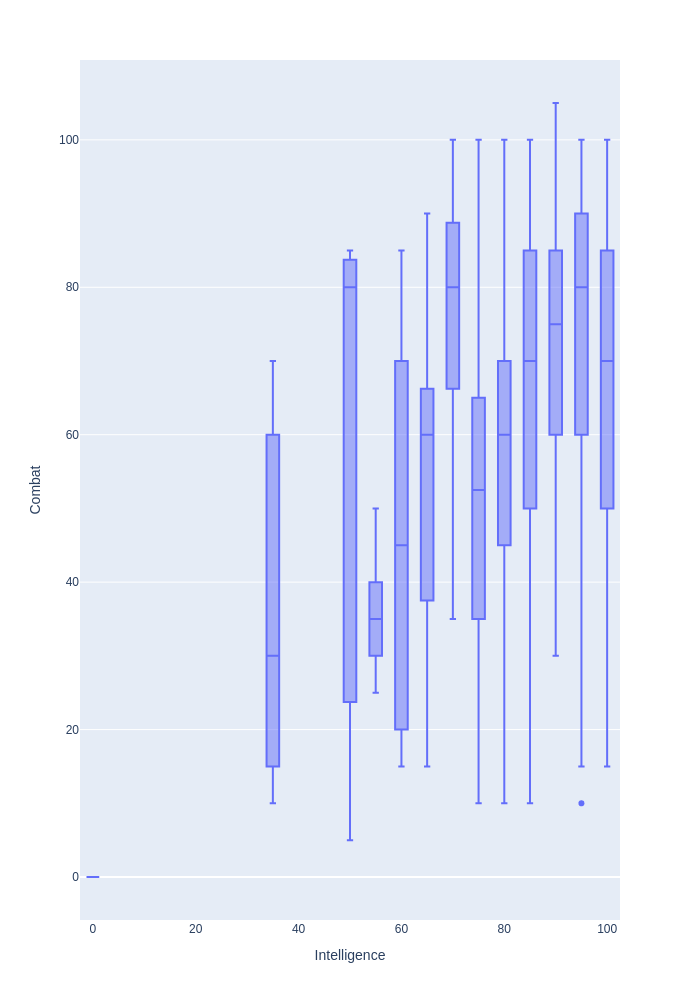

In [32]:
fig = px.box(hero, x='Intelligence', y="Combat", height=1000)

fig.show(renderer="png")

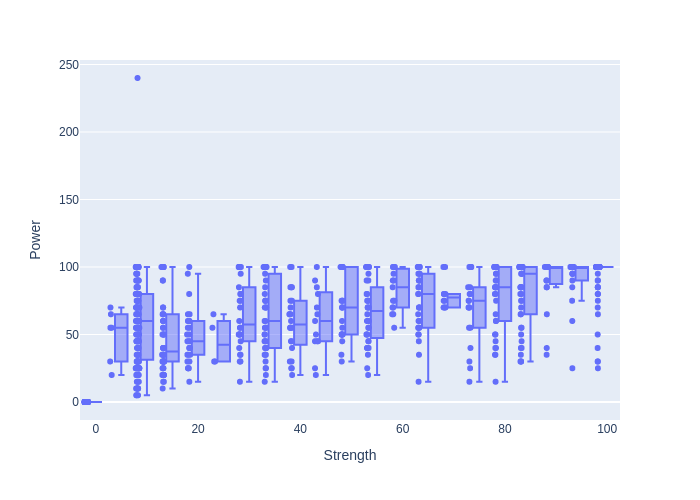

In [38]:
fig = px.box(hero, x="Strength", y="Power", points="all")
fig.show(renderer = "png")